Boosting example

In [14]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
# --------- Classifiers ------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [33]:
def train_and_evaluate_adaboost(base_estimator, n_estimators=10, test_size=0.2, random_state=42, cv_folds=5, bagging=False, n_bags=10, max_samples=1.0, max_features=1.0):
    # Load the Iris dataset
    X, y = load_digits(return_X_y=True)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Apply bagging if specified
    if bagging:
        bagged_estimator = BaggingClassifier(
            estimator=base_estimator,
            n_estimators=n_bags,
            max_samples=max_samples,
            max_features=max_features,
            random_state=random_state,
            n_jobs = -1
        )

    # Initialize the AdaBoost Classifier with the specified base estimator
    if(bagging):
        clf = AdaBoostClassifier(estimator=bagged_estimator, n_estimators=n_estimators, random_state=random_state)
    else:
        clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, random_state=random_state)
    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=cv_folds, scoring='accuracy')

    # Fit the model on the entire training set
    clf.fit(X_train, y_train)

    # Predict the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model on the test set
    test_accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print("---------------------------------------------------------")
    print(f"Cross-validation accuracy with {'Bagged ' if bagging else ''}{type(base_estimator).__name__} as base estimator: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
    print(f"Test set accuracy with {'Bagged ' if bagging else ''}{type(base_estimator).__name__} as base estimator: {test_accuracy:.2f}")
    print("---------------------------------------------------------")
    # Return the trained classifier
    return clf


## Non Bagged tests

In [34]:
decision_tree_base = DecisionTreeClassifier(max_depth=12)
trained_clf_dt = train_and_evaluate_adaboost(decision_tree_base,
                                             n_estimators=8,
                                              cv_folds=10)

---------------------------------------------------------
Cross-validation accuracy with DecisionTreeClassifier as base estimator: 0.90 ± 0.05
Test set accuracy with DecisionTreeClassifier as base estimator: 0.94
---------------------------------------------------------


In [35]:
rf_base = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
trained_clf_randomforest = train_and_evaluate_adaboost(rf_base,
                                              n_estimators=8,
                                              cv_folds=10)

---------------------------------------------------------
Cross-validation accuracy with RandomForestClassifier as base estimator: 0.93 ± 0.02
Test set accuracy with RandomForestClassifier as base estimator: 0.96
---------------------------------------------------------


In [36]:
# logreg_base = LogisticRegression(solver='lbfgs', max_iter=500)
# trained_clf_logreg = train_and_evaluate_adaboost(logreg_base,
#                                               n_estimators=8,
#                                               cv_folds=10)

## Trying Grad-Boosting

In [37]:
# from sklearn.ensemble import GradientBoostingClassifier
# gradient_boosting_base = GradientBoostingClassifier(n_estimators=15,
#                                                     learning_rate=0.2,
#                                                     max_depth=1)
# trained_clf_gb = train_and_evaluate_adaboost(gradient_boosting_base,
#                                              n_estimators=8,
#                                              cv_folds=10)


## Different Descision tree

In [38]:
# gradient_boosting_base = GradientBoostingClassifier(n_estimators=15,
#                                                     learning_rate=0.2,
#                                                     max_depth=3)
# trained_clf_gb = train_and_evaluate_adaboost(gradient_boosting_base,
#                                              n_estimators=8,
#                                              cv_folds=10)

# Bagging and boosting

In [39]:
decision_tree_base = DecisionTreeClassifier(max_depth=12)
trained_clf_dt = train_and_evaluate_adaboost(decision_tree_base,
                                             n_estimators=8,
                                             bagging = True,
                                             n_bags = 8,
                                              cv_folds=10)

---------------------------------------------------------
Cross-validation accuracy with Bagged DecisionTreeClassifier as base estimator: 0.96 ± 0.02
Test set accuracy with Bagged DecisionTreeClassifier as base estimator: 0.97
---------------------------------------------------------


In [40]:
rf_base = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
trained_clf_randomforest = train_and_evaluate_adaboost(rf_base,
                                              n_estimators=8,
                                              bagging = True,
                                              n_bags = 8,
                                              cv_folds=10)

---------------------------------------------------------
Cross-validation accuracy with Bagged RandomForestClassifier as base estimator: 0.97 ± 0.01
Test set accuracy with Bagged RandomForestClassifier as base estimator: 0.98
---------------------------------------------------------


## Grad boosted, adaptive boosted and bootstrap aggregated model

In [55]:
gradient_boosting_base = GradientBoostingClassifier(n_estimators=15,
                                                    learning_rate=0.1,
                                                    max_depth=3)
trained_clf_gb = train_and_evaluate_adaboost(gradient_boosting_base,
                                             n_estimators=12,
                                             bagging = True,
                                             n_bags = 5,
                                             cv_folds=10)

---------------------------------------------------------
Cross-validation accuracy with Bagged GradientBoostingClassifier as base estimator: 0.96 ± 0.02
Test set accuracy with Bagged GradientBoostingClassifier as base estimator: 0.97
---------------------------------------------------------


# XGBoosting

In [59]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score ,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import xgboost as xgb
import numpy as np

# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split dataset into training and test sets (with random seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# Initialize classifiers (with random_state where applicable)
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=6,criterion = 'entropy', 
                                            random_state=random_seed,n_jobs=-1),
    'Logistic Regression': LogisticRegression(max_iter=500,
                                              random_state=random_seed),
    'Decision Tree': DecisionTreeClassifier(max_depth=15,
                                            random_state=random_seed),
    'AdaBoost': AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=3,criterion = 'entropy',random_state=random_seed),
                                   n_estimators=250,learning_rate=0.5,
                                   random_state=random_seed),
    'XGBoost': xgb.XGBClassifier(max_depth=5,learning_rate=0.2,n_estimators=180,subsample= 0.6,colsample_bytree=0.6,
                                 use_label_encoder=False, eval_metric='mlogloss', 
                                 random_state=random_seed,n_jobs=-1)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Optional: Cross-validation with random seed
    cv_scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed))
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f}\n")


Random Forest Accuracy: 0.9204
Random Forest Cross-Validation Accuracy: 0.9199

Logistic Regression Accuracy: 0.9685
Logistic Regression Cross-Validation Accuracy: 0.9666

Decision Tree Accuracy: 0.8426
Decision Tree Cross-Validation Accuracy: 0.8547

AdaBoost Accuracy: 0.9370
AdaBoost Cross-Validation Accuracy: 0.9421

XGBoost Accuracy: 0.9685
XGBoost Cross-Validation Accuracy: 0.9738



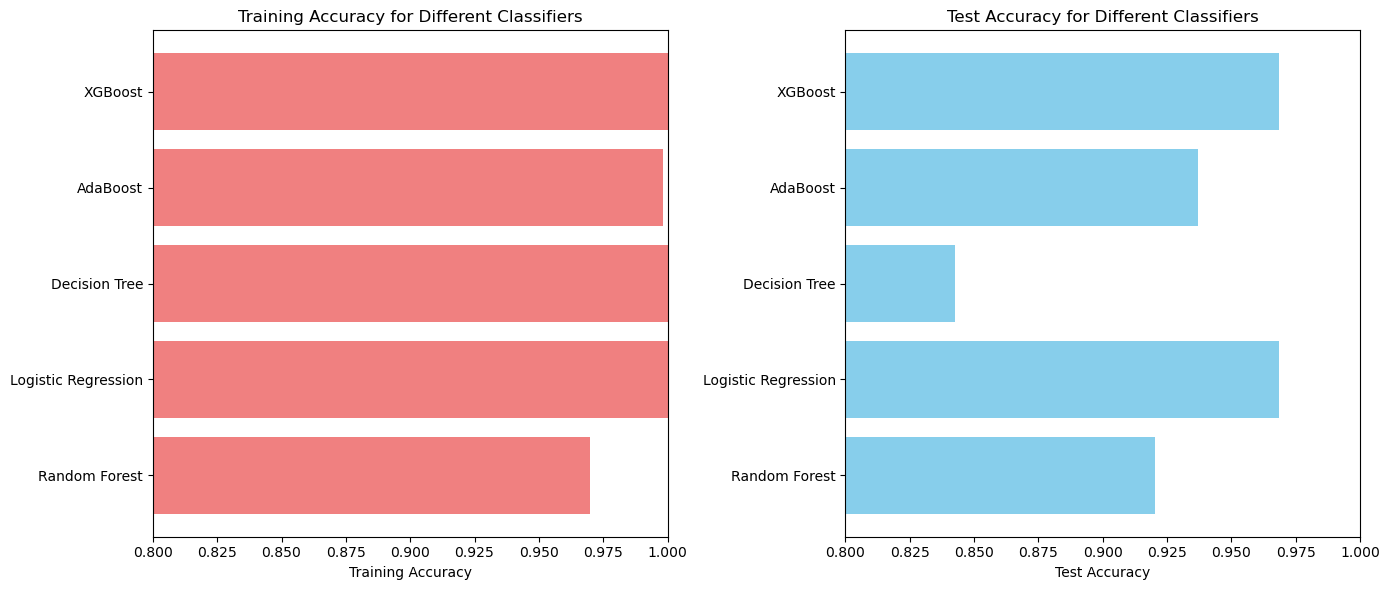

In [60]:
import matplotlib.pyplot as plt

# Dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Fit the classifier
    clf.fit(X_train, y_train)
    
    # Calculate training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies[name] = train_accuracy
    
    # Calculate test accuracy
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies[name] = test_accuracy

# Plotting the training accuracies
plt.figure(figsize=(14, 6))

# Training Accuracy Plot
plt.subplot(1, 2, 1)
plt.barh(list(train_accuracies.keys()), list(train_accuracies.values()), color='lightcoral')
plt.xlabel('Training Accuracy')
plt.title('Training Accuracy for Different Classifiers')
plt.xlim(0.8, 1.0)  # Adjust the range if necessary

# Test Accuracy Plot
plt.subplot(1, 2, 2)
plt.barh(list(test_accuracies.keys()), list(test_accuracies.values()), color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Test Accuracy for Different Classifiers')
plt.xlim(0.8, 1.0)  # Adjust the range if necessary

plt.tight_layout()
plt.show()
